**Name: Ubaid Shah <br>
Email: ubaidhaina@gmail.com**


I have analysed and predicted the NSE data. Detailed notebook with comments for your referance

In [1]:
# Import all essential libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score 




In [7]:
# import train and test data

train=pd.read_csv(r"C:\Users\Ubaid Shah\Predic_the_Market_Fluid_AI_Test\NSE Data\NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv",index_col=0)
train.index = pd.to_datetime(train.index)


test=pd.read_csv(r"C:\Users\Ubaid Shah\Predic_the_Market_Fluid_AI_Test\NSE Data\NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv",index_col=0)
test.index = pd.to_datetime(test.index)


In [8]:
train.shape,test.shape

((1481, 6), (23, 6))

In [9]:
train.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2016-01-04  7924.549805  7937.549805  7781.100098  7791.299805  7791.299805   
2016-01-05  7828.399902  7831.200195  7763.250000  7784.649902  7784.649902   
2016-01-06  7788.049805  7800.950195  7721.200195  7741.000000  7741.000000   
2016-01-07  7673.350098  7674.950195  7556.600098  7568.299805  7568.299805   
2016-01-08  7611.649902  7634.100098  7581.049805  7601.350098  7601.350098   

              Volume  
Date                  
2016-01-04  134700.0  
2016-01-05  145200.0  
2016-01-06  147100.0  
2016-01-07  188900.0  
2016-01-08  157400.0

In [10]:
test.head()

Open          High           Low         Close  \
Date                                                                 
2022-01-03  17387.150391  17646.650391  17383.300781  17625.699219   
2022-01-04  17681.400391  17827.599609  17593.550781  17805.250000   
2022-01-05  17820.099609  17944.699219  17748.849609  17925.250000   
2022-01-06  17768.500000  17797.949219  17655.550781  17745.900391   
2022-01-07  17797.599609  17905.000000  17704.550781  17812.699219   

               Adj Close  Volume  
Date                              
2022-01-03  17625.699219  200500  
2022-01-04  17805.250000  247400  
2022-01-05  17925.250000  251500  
2022-01-06  17745.900391  236500  
2022-01-07  17812.699219  239300

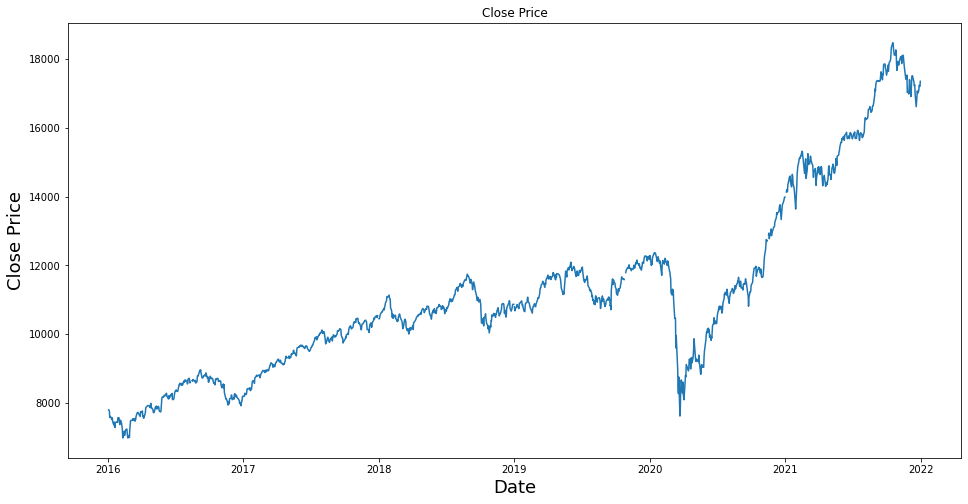

In [11]:
# Plot Closing price

plt.figure(figsize=(16,8))
plt.title("Close Price")

plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train["Close"])
plt.show()

In [12]:
# check if there is any null value in data set

train["Close"].isnull().any()

True

In [13]:
# see differance after droping the null values
train.dropna()

Open          High           Low         Close  \
Date                                                                 
2016-01-04   7924.549805   7937.549805   7781.100098   7791.299805   
2016-01-05   7828.399902   7831.200195   7763.250000   7784.649902   
2016-01-06   7788.049805   7800.950195   7721.200195   7741.000000   
2016-01-07   7673.350098   7674.950195   7556.600098   7568.299805   
2016-01-08   7611.649902   7634.100098   7581.049805   7601.350098   
...                  ...           ...           ...           ...   
2021-12-27  16937.750000  17112.050781  16833.199219  17086.250000   
2021-12-28  17177.599609  17250.250000  17161.150391  17233.250000   
2021-12-29  17220.099609  17285.949219  17176.650391  17213.599609   
2021-12-30  17201.449219  17264.050781  17146.349609  17203.949219   
2021-12-31  17244.500000  17400.800781  17238.500000  17354.050781   

               Adj Close    Volume  
Date                                
2016-01-04   7791.299805  134700.0  
2016-01-05   7784.649902  145200.0  
2016-01-06   7741.000000  147100.0  
2016-01-07   7568.299805  188900.0  
2016-01-08   7601.350098  157400.0  
...                  ...       ...  
2021-12-27  17086.250000  144800.0  
2021-12-28  17233.250000  176000.0  
2021-12-29  17213.599609  161700.0  
2021-12-30  17203.949219  320800.0  
2021-12-31  17354.050781  167000.0  

[1475 rows x 6 columns]

In [14]:
# Use only Closing price for prediction

close_data=train.filter(["Close"]).dropna()
train_close_data=close_data.values
train_close_data
# test_close=pd.DataFrame(test["Close"].dropna())


array([[ 7791.299805],
       [ 7784.649902],
       [ 7741.      ],
       ...,
       [17213.599609],
       [17203.949219],
       [17354.050781]])

In [15]:
train_close_data.shape

(1475, 1)

In [16]:
# split the data for training and validation purpose
training_data_size=math.ceil(len(train_close_data)*0.7)
training_data_size

1033

In [17]:
# Scale down the values of closing price between 0 and 1

scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
scaled_training_array=scaler.fit_transform(train_close_data)

In [19]:
scaled_training_array

array([[0.07132518],
       [0.07074726],
       [0.06695374],
       ...,
       [0.89019627],
       [0.88935758],
       [0.90240257]])

In [20]:
train_data=scaled_training_array[0:training_data_size,:]

In [21]:
len(train_data)

1033

In [22]:
train_data

array([[0.07132518],
       [0.07074726],
       [0.06695374],
       ...,
       [0.173507  ],
       [0.1302052 ],
       [0.11235872]])

In [23]:
# Create an array for traing

x_train=[]
y_train=[]

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i,0])
    y_train.append(train_data[i,0])
    
    if i<=100:
        print(x_train)
        print(y_train)
    
    


[array([0.07132518, 0.07074726, 0.06695374, 0.05194475, 0.05481708,
       0.05155804, 0.0469041 , 0.051432  , 0.04920716, 0.04060329,
       0.03305971, 0.04036866, 0.02943564, 0.02661113, 0.03926929,
       0.0404599 , 0.04059896, 0.03946046, 0.05153194, 0.05087147,
       0.0421459 , 0.0339983 , 0.03766582, 0.04506168, 0.03621011,
       0.02847099, 0.0213011 , 0.00049972, 0.0008995 , 0.01671672,
       0.00674838, 0.01198024, 0.01921965, 0.02087089, 0.02293928,
       0.01207581, 0.00418027, 0.        , 0.00514059, 0.00142961,
       0.02187466, 0.03461102, 0.04388843, 0.04473578, 0.04473141,
       0.04877262, 0.04480529, 0.04689544, 0.04937664, 0.04258481,
       0.04590033, 0.04709964, 0.0550778 , 0.06375988, 0.06468544,
       0.0648245 , 0.05601206, 0.05443902, 0.06644969, 0.06672777,
       0.06452465, 0.06850068, 0.05497787, 0.05594688, 0.05004585,
       0.05080629, 0.06090495, 0.06416836, 0.07646581, 0.08204964,
       0.08205397, 0.0818193 , 0.08071122, 0.07686555, 0.0862

In [24]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train.shape

(933, 100)

In [26]:
# Reshape Numpy Array for LSTM since it considor a Tensor that is 3D array

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(933, 100, 1)

In [27]:
# Create a LSTM model for training
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,
              input_shape=(x_train.shape[1],1)))


model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))

model.add(Dense(units=1))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model in LSTM and run the training
model.compile(optimizer="adam",loss="mean_squared_error")

model.fit(x_train,y_train,batch_size=1,epochs=1)

933/933 [==============================] - 31s 30ms/step - loss: 0.0013


In [30]:
test_data=scaled_training_array[training_data_size-100:,:]

In [31]:
len(test_data)

542

In [32]:
# Take the values from train model for primary testing

x_test=[]
y_test=train_close_data[training_data_size:,:]

for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [33]:
x_test=np.array(x_test)

In [34]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [35]:
x_test.shape

(442, 100, 1)

In [36]:
# predict the share price
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [37]:
predictions.shape

(442, 1)

In [38]:
y_test.shape

(442, 1)

In [39]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)

In [40]:
rmse

694.4955745386029

In [41]:
y_test

array([[ 8745.450195],
       [ 7610.25    ],
       [ 7801.049805],
       [ 8317.849609],
       [ 8641.450195],
       [ 8660.25    ],
       [ 8281.099609],
       [ 8597.75    ],
       [ 8253.799805],
       [ 8083.799805],
       [ 8792.200195],
       [ 8748.75    ],
       [ 9111.900391],
       [ 8993.849609],
       [ 8925.299805],
       [ 8992.799805],
       [ 9266.75    ],
       [ 9261.849609],
       [ 8981.450195],
       [ 9187.299805],
       [ 9313.900391],
       [ 9154.400391],
       [ 9282.299805],
       [ 9380.900391],
       [ 9553.349609],
       [ 9859.900391],
       [ 9293.5     ],
       [ 9205.599609],
       [ 9270.900391],
       [ 9199.049805],
       [ 9251.5     ],
       [ 9239.200195],
       [ 9196.549805],
       [ 9383.549805],
       [ 9142.75    ],
       [ 9136.849609],
       [ 8823.25    ],
       [ 8879.099609],
       [ 9066.549805],
       [ 9106.25    ],
       [ 9039.25    ],
       [ 9029.049805],
       [ 9314.950195],
       [ 94

In [42]:
train_data=close_data

In [43]:
train_data.shape

(1475, 1)

In [44]:
train_data.tail(1)

Close
Date                    
2021-12-31  17354.050781

In [45]:
close_test_data=test.filter(["Close"]).dropna()

close_test_data.head(1)


Close
Date                    
2022-01-03  17625.699219

In [46]:
past_100=train_data.tail(100)

In [47]:
past_100.tail(1)

Close
Date                    
2021-12-31  17354.050781

In [48]:
final_df=past_100.append(close_test_data)

<AxesSubplot:xlabel='Date'>

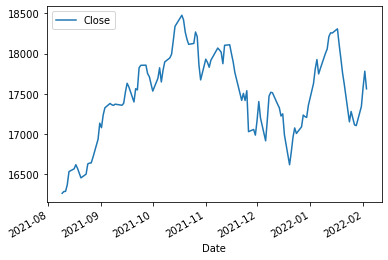

In [49]:
final_df.plot()

In [50]:
predictions[442-23:]

array([[16127.164],
       [16057.447],
       [16026.267],
       [16003.956],
       [15967.533],
       [15948.838],
       [15965.154],
       [16004.047],
       [16052.947],
       [16092.394],
       [16120.013],
       [16129.958],
       [16131.022],
       [16105.202],
       [16036.692],
       [15962.752],
       [15906.008],
       [15873.271],
       [15852.061],
       [15846.906],
       [15863.568],
       [15889.915],
       [15919.325]], dtype=float32)

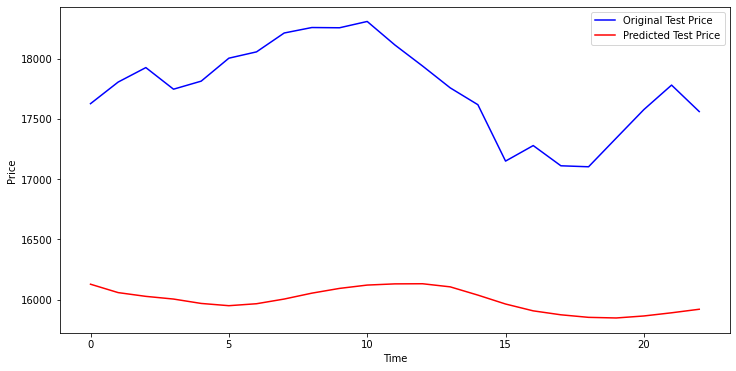

In [51]:
# Plot the graph between prediction and original test data for validation

plt.figure(figsize=(12,6))
plt.plot(close_test_data.values,"b",label="Original Test Price")
plt.plot(predictions[442-23:],"r",label="Predicted Test Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [52]:
# Evaluation metrices RMSE and MAE
print("Test data RMSE: ", math.sqrt(mean_squared_error(predictions,y_test)))
print("Test data MSE: ", mean_squared_error(y_test, predictions))
print("Test data MAE: ", mean_absolute_error(y_test, predictions))
print("Test data R2 score:", r2_score(y_test, predictions))
print("Test data MAPE:", mean_absolute_percentage_error(y_test, predictions))


Test data RMSE:  841.896786332433
Test data MSE:  708790.1988368782
Test data MAE:  727.9136051537047
Test data R2 score: 0.9121602382433951
Test data MAPE: 0.049537481988255645
